In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn')


In [14]:
mean1 = np.array([1,0.5])
cov1=np.array([[1,0.1],[0.1,1.2]])

mean2 = np.array([4,5])
cov2=np.array([[1.2,0.1],[0.1,1.3]])

dist1 = np.random.multivariate_normal(mean1,cov1,500)
dist2 = np.random.multivariate_normal(mean2,cov2,500)
print(dist1.shape)
print(dist2.shape)

(500, 2)
(500, 2)


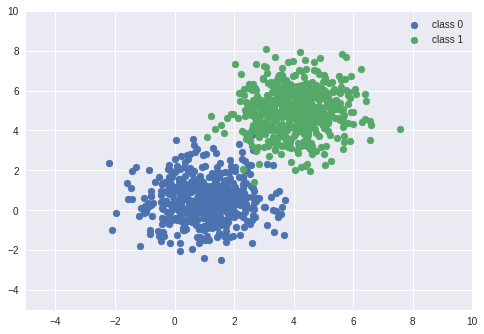

In [15]:
plt.scatter(dist1[:,0],dist1[:,1],label='class 0')
plt.scatter(dist2[:,0],dist2[:,1],label='class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.legend()
plt.show()

###Logistic Regression

In [16]:
Y = np.zeros(2*dist1.shape[0])
Y[500:] =1
X=np.vstack((dist1,dist2))


x_train=X[:800,:]
x_test=X[800:,:]

y_train=Y[:800]
y_test=Y[800:]
# print(y_test)

In [17]:
def sigmoid(z):
    
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypo(x,w,b):
    
    h = np.dot(x,w) + b
    
    return sigmoid(h)

def error(y_true,x,w,b):
    
    m = x.shape[0]
    err=0.0
    
    for ix in range(m):
        hx = hypo(x[ix],w,b)
        err += y_true[ix]*np.log2(hx) + (1-y_true[ix])*np.log2(1-hx)
        
     
    return -err/m

def get_grad(y_true,x,w,b):
    
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    
    m= x.shape[0]
    n= x.shape[1]
    for i in range(m):
        for j in range(n):
            hx = hypo(x[i],w,b)
        
            grad_w[j] += -1*(y_true[i] - hx)*x[i][j]
            grad_b += -1*(y_true[i] - hx)
        
        
    grad_w /=m
    grad_b /=m
    
    return [grad_w, grad_b]

def grad_Descent(x,y_true,w,b,lr):
    
    err=error(y_true,x,w,b)
    
    [grad_w,grad_b] = get_grad(y_true,x,w,b)
    for i in range(w.shape[0]):
             w[i] = w[i] - lr*grad_w[i]
    b = b - lr*grad_b
   
    
    return err,w,b



def predict(x,w,b):
    
    conf = hypo(x,w,b)
    
    if conf<0.5:
        return 0
    else:
        return 1
    
def accuracy(x_test,y_test,w,b):
    
    y_pred=[]
    
    for i in range(y_test.shape[0]):
        pred=predict(x_test[i],w,b)
        y_pred.append(pred)
        
        
    return 100*float((y_pred==y_test).sum())/y_test.shape[0]
    
            
        

In [18]:
errors = []
acc= []
W = 3*np.random.random(x_train.shape[1],)
B = 5*np.random.random()


In [19]:
for ix in range(100):
    e,W,B=grad_Descent(x_train,y_train,W,B,lr=0.5)
    errors.append(e)
    
    

##TESTING


In [20]:
print('Accuracy in %')
print(accuracy(x_test,y_test,W,B))

Accuracy in %
99.0


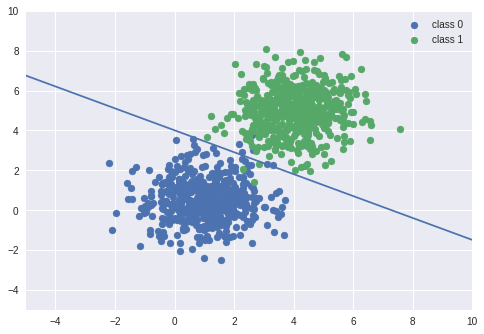

In [22]:
plt.scatter(dist1[:,0],dist1[:,1],label='class 0')
plt.scatter(dist2[:,0],dist2[:,1],label='class 1')


xtest = np.linspace(-5,10,2)
# print(xtest)



# plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(xtest,-(B+W[0]*xtest)/W[1])





# plt.plot(x_test,hypo(x_test,W,B))
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.legend()
plt.show()

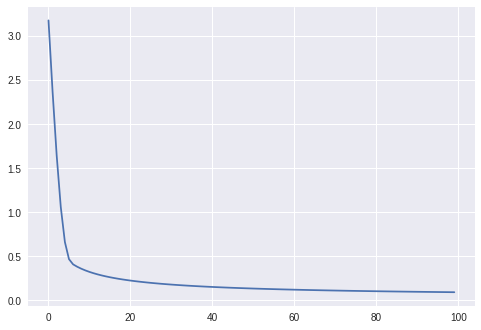

In [23]:
plt.plot(errors)